In [27]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Santa Barbara Air Quality During the 2017 Thomas Fire

**Author:** Emily Miller  
**Repository:** [https://github.com/rellimylime/eds220-hwk2](https://github.com/rellimylime/eds220-hwk2)

---

## About

### Purpose
This notebook analyzes Air Quality Index (AQI) data from Santa Barbara County during the 2017 Thomas Fire to quantify the wildfire's impact on local air quality and demonstrate time series analysis techniques for environmental datasets.

### Highlights
- **Time series data manipulation**: Working with datetime objects and temporal indexing in pandas
- **Data integration**: Combining multiple years of AQI data from EPA databases
- **Rolling window analysis**: Calculating 5-day moving averages to smooth daily variation
- **Event-focused visualization**: Creating informative time series plots highlighting the Thomas Fire period

### About the Data
This analysis uses daily Air Quality Index (AQI) data from the U.S. Environmental Protection Agency's Air Quality System (AQS). The AQI is a standardized indicator of air quality that incorporates measurements of major air pollutants including particulate matter (PM2.5, PM10), ozone, carbon monoxide, sulfur dioxide, and nitrogen dioxide. Data spans 2017-2018 for Santa Barbara County, California, capturing the period before, during, and after the Thomas Fire (December 4, 2017 - January 12, 2018).

### References
U.S. Environmental Protection Agency. (2024). *Air quality index basics*. AirNow. https://www.airnow.gov/aqi/aqi-basics/

U.S. Environmental Protection Agency. (2024). *Pre-generated data files* [Data files]. Air Quality System (AQS). https://www.epa.gov/outdoor-air-quality-data

Wikipedia contributors. (2024). *Thomas Fire*. In *Wikipedia, The Free Encyclopedia*. https://en.wikipedia.org/wiki/Thomas_Fire

---

## Complete Analysis Workflow

The following cell contains the complete end-to-end analysis, from data import to final visualization.

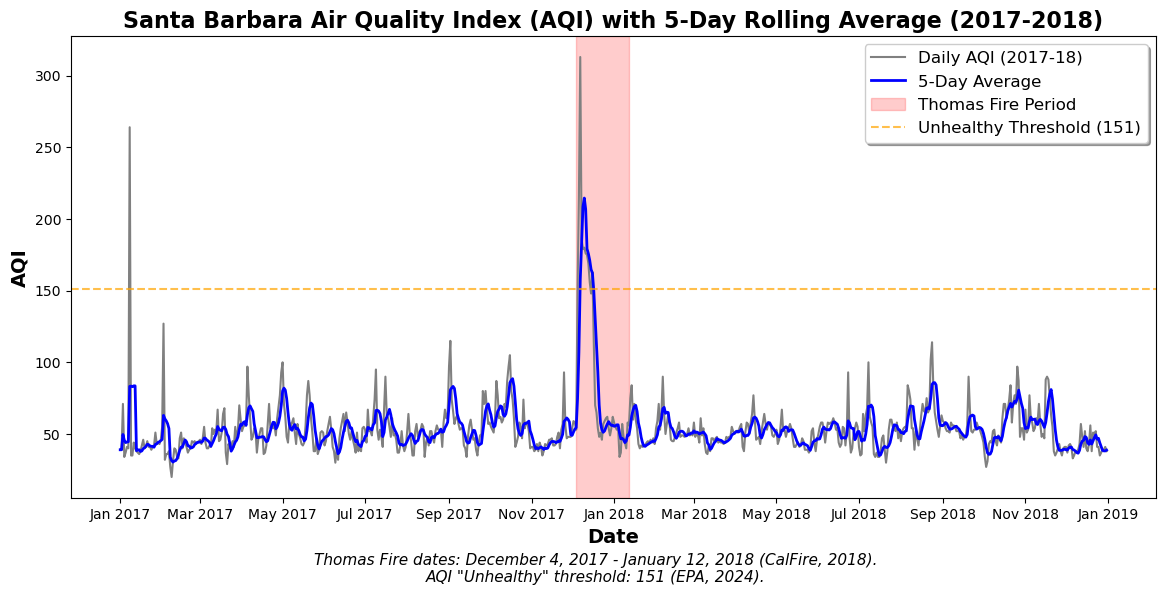

In [28]:
# FINAL CODE

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read and combine data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

# Concatenate data for 2017 and 2018
aqi = pd.concat([aqi_17, aqi_18])

# Clean column names
aqi.columns = aqi.columns.str.lower().str.replace(' ', '_')

# Filter, select columns, convert date, and set index
aqi_sb = (aqi[aqi['county_name'] == "Santa Barbara"]
          [['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']])

# Convert 'date' column to datetime
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])

# Set 'date' as index
aqi_sb = aqi_sb.set_index('date')

# Calculate 5-day rolling average
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling("5D").mean()

# Create figure and axis
fig, ax = plt.subplots(figsize = (14, 6))

# Plot data
ax.plot(aqi_sb.index, aqi_sb['aqi'], label = "Daily AQI (2017-18)", color = 'gray', linewidth = 1.5)
ax.plot(aqi_sb.index, aqi_sb['five_day_average'], label = '5-Day Average', color = "blue", linewidth = 2)
ax.axvspan(pd.to_datetime('2017-12-04'), pd.to_datetime('2018-01-12'), 
           alpha = 0.2, color = 'red', label = 'Thomas Fire Period')
ax.axhline(y = 151, color = 'orange', linestyle = '--', linewidth = 1.5, 
           alpha = 0.7, label = 'Unhealthy Threshold (151)')

# Add x label formating
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))

# Add title, axis labels, and legend
ax.set_title('Santa Barbara Air Quality Index (AQI) with 5-Day Rolling Average (2017-2018)', 
             fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Date', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('AQI', fontsize = 14, fontweight = 'bold')
ax.legend(loc = 'upper right', frameon = True, shadow = True, fontsize = 12)
fig.text(0.5, -0.03, 
         'Thomas Fire dates: December 4, 2017 - January 12, 2018 (CalFire, 2018).\n'
         'AQI "Unhealthy" threshold: 151 (EPA, 2024).',
         ha = 'center', fontsize = 11, style = 'italic')
# Display polt
plt.show()


First, load necessary libraries and import the data.

In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

Examine the structure of both datasets to ensure they're consistent and understand what variables are available.

In [30]:
# Store head of 2017 data
aqi_17_head = aqi_17.head()

# Display the head of 2017 data
aqi_17_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [31]:
# Store the first 5 rows of aqi_18
aqi_18_head = aqi_18.head()

# Display the head of 2018 data
aqi_18_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


In [32]:
grader.check("q3_a")

q3_a results: All test cases passed!

Examine the structure of both datasets more closely to understand variable types and unique values.

In [33]:
# Display column information for 2017 data: non-null counts and data types
aqi_17.info()
# Display column information for 2018 data to verify consistency
aqi_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327541 entries, 0 to 327540
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 

In [34]:
# Count unique values in each column for 2017
display(aqi_17.nunique())
# Count unique values in each column for 2018
display(aqi_18.nunique())

State Name                     54
county Name                   796
State Code                     54
County Code                   160
Date                          365
AQI                           341
Category                        6
Defining Parameter              5
Defining Site                2133
Number of Sites Reporting      35
dtype: int64

State Name                     54
county Name                   793
State Code                     54
County Code                   160
Date                          365
AQI                           300
Category                        6
Defining Parameter              5
Defining Site                2105
Number of Sites Reporting      35
dtype: int64

In [35]:
# View the first 50 unique county names, and unique county codes
print(aqi_17['county Name'].unique()[:50], "...")
print(aqi_17['County Code'].unique()[:50], "...")

# Make sure there are no empty values in the code or name columns
print(aqi_17[(aqi_17['County Code'] == "") | (aqi_17['county Name'] == "")])

['Baldwin' 'Clay' 'Colbert' 'DeKalb' 'Elmore' 'Etowah' 'Houston'
 'Jefferson' 'Lawrence' 'Madison' 'Mobile' 'Montgomery' 'Morgan' 'Russell'
 'Shelby' 'Sumter' 'Talladega' 'Tuscaloosa' 'Aleutians East ' 'Anchorage '
 'Denali ' 'Fairbanks North Star ' 'Juneau ' 'Kenai Peninsula '
 'Matanuska-Susitna ' 'Apache' 'Cochise' 'Coconino' 'Gila' 'La Paz'
 'Maricopa' 'Mohave' 'Navajo' 'Pima' 'Pinal' 'Santa Cruz' 'Yavapai' 'Yuma'
 'Arkansas' 'Ashley' 'Clark' 'Crittenden' 'Garland' 'Jackson' 'Newton'
 'Polk' 'Pulaski' 'Union' 'Washington' 'Alameda'] ...
[  3  27  33  49  51  55  69  73  79  89  97 101 103 113 117 119 121 125
  13  20  68  90 110 122 170   1   5   7  12  15  17  19  21  23  25  35
  67 139 143   9  11  29  31  37  39  41  43  45  47  53] ...
Empty DataFrame
Columns: [State Name, county Name, State Code, County Code, Date, AQI, Category, Defining Parameter, Defining Site, Number of Sites Reporting]
Index: []


In [36]:
# Display the different categories
display(aqi_17['Category'].unique())
display(aqi_18['Category'].unique())

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

array(['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy', 'Hazardous'], dtype=object)

**Interpretation of Initial Exploration:**

The datasets are well-structured and consistent between years:
- **Dataset size**: Over 326,000 observations per year covering all U.S. counties with air quality monitoring
- **Complete data**: All columns have no null values, indicating high data quality
- **Consistent structure**: Both years have identical column structure and data types
- **AQI categories**: Six categories ranging from "Good" to "Hazardous"
- **County coding**: County codes are reused across states (hence fewer unique codes than county names), requiring both state and county identifiers for unique location identification

Data Cleaning:

Combine the 2017 and 2018 datasets into a single DataFrame for analysis.

In [37]:
# 'Glue' the two dataframes together
aqi = pd.concat([aqi_17, aqi_18])

# Return combined
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [38]:
grader.check("q4")

q4 results: All test cases passed!

Standardize column names for consistency across datasets.

In [39]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



**Column Name Transformation:**

This code chain uses the `.str` accessor to treat the column Index as strings:
- `.str.lower()` converts all letters to lowercase (e.g., "State Name" → "state name")
- `.str.replace(' ','_')` replaces all spaces with underscores (e.g., "state name" → "state_name")


Geographic Subsetting:

Focus the analysis on Santa Barbara County, California by filtering the combined dataset.

In [40]:
# Select only data from Santa Barbara county and store it in a new variable
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# Remove the state and county descriptor columns from the filtered data
aqi_sb = aqi_sb[['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']]

# Return filtered data
aqi_sb

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


In [41]:
grader.check("q6a")

q6a results: All test cases passed!

DateTime Conversion:

Check the data type of the each value in the date column

In [42]:
# Display the type of each value in the date column 
aqi_sb['date'].apply(type)

28648    <class 'str'>
28649    <class 'str'>
28650    <class 'str'>
28651    <class 'str'>
28652    <class 'str'>
             ...      
29128    <class 'str'>
29129    <class 'str'>
29130    <class 'str'>
29131    <class 'str'>
29132    <class 'str'>
Name: date, Length: 730, dtype: object

*Date Type Issue: The date column contains string objects (`str`) rather than datetime objects. This prevents time-based operations like filtering by date range, resampling, or using rolling windows with time-based offsets. We need to convert this column to datetime type.*

Convert the `date` column to datetime objects using `pd.to_datetime()` and set it as the DataFrame index.

In [43]:
# Use `pd.to_datetime` to update the date column values
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# Set the 'date' column as the new index
aqi_sb = aqi_sb.set_index("date")

# Return updated
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


Calculate 5-Day Rolling Average:

Calculate a 5-day rolling average of the AQI to smooth out daily fluctuations and highlight broader trends.

In [44]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling("5D").mean()

# View the resulting series
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

In [45]:
grader.check("q8")

q8 results: All test cases passed!

Add a new column `aqi_5day_avg` to the DataFrame containing the rolling average values.

In [46]:
# Add a new column containing the 5 day rolling average
aqi_sb['five_day_average'] = rolling_average

# Check out new column
aqi_sb.head()

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,37,Good,Ozone,06-083-4003,12,44.000000


In [47]:
grader.check("q9")

q9 results: All test cases passed!

Data Visualization:

Create a time series plot of daily AQI values and the 5-day rolling average for Santa Barbara County, highlighting the Thomas Fire period.

Text(0.5, -0.1, 'Thomas Fire dates: December 4, 2017 - January 12, 2018 (CalFire, 2018).\nAQI "Unhealthy" threshold: 151 (EPA, 2024).')

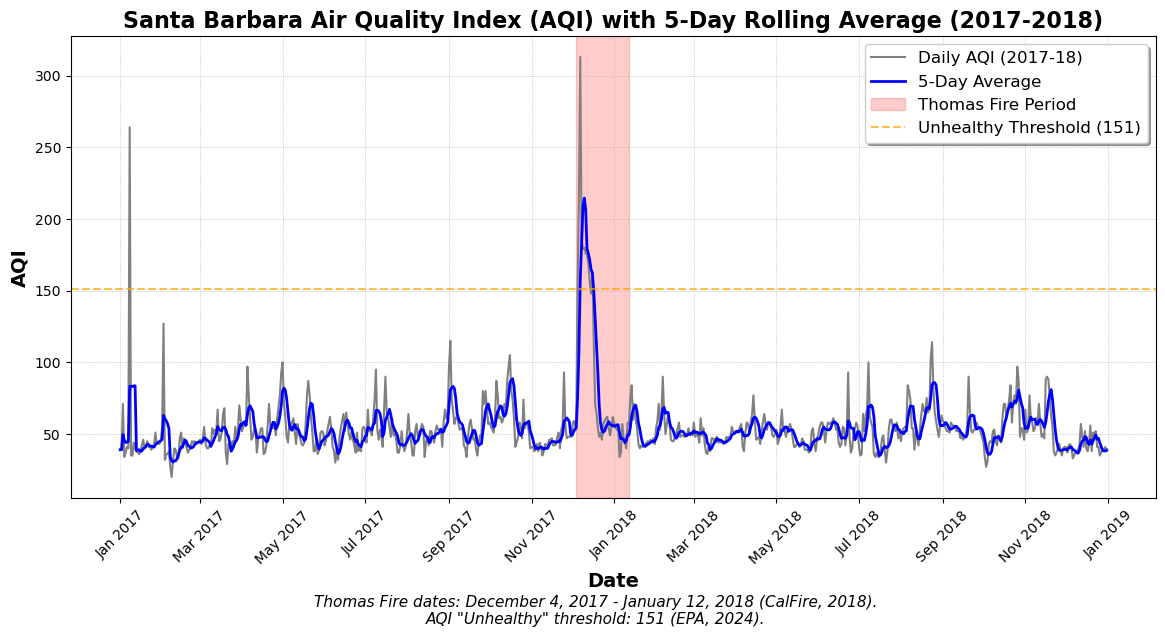

In [48]:
# Create figure and axis
fig, ax = plt.subplots(figsize = (14, 6))

# Plot daily AQI
ax.plot(aqi_sb.index, aqi_sb['aqi'], label = "Daily AQI (2017-18)", color = 'gray', linewidth = 1.5)

# Plot 5-day rolling average
ax.plot(aqi_sb.index, aqi_sb['five_day_average'], label = '5-Day Average', color = "blue", linewidth = 2)

# Highlight the Thomas Fire period (December 2017)
fire_start = pd.to_datetime('2017-12-04')
fire_end = pd.to_datetime('2018-01-12')
ax.axvspan(fire_start, fire_end, alpha = 0.2, color = 'red', 
           label = 'Thomas Fire Period')

# Add horizontal line for "Unhealthy" AQI threshold (151)
ax.axhline(y = 151, color = 'orange', linestyle = '--', linewidth = 1.5, 
           alpha = 0.7, label = 'Unhealthy Threshold (151)')

# Add grid for easier reading
ax.grid(True, linestyle = ':', linewidth = 0.5)

# Format x-axis to show months clearly
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45)

# Add title and axis labels
ax.set_title('Santa Barbara Air Quality Index (AQI) with 5-Day Rolling Average (2017-2018)', 
             fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Date', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('AQI', fontsize = 14, fontweight = 'bold')

# Position and customize legend
ax.legend(loc = 'upper right', frameon = True, shadow = True, fontsize = 12)

# Add caption with citations
fig.text(0.5, -0.1, 
         'Thomas Fire dates: December 4, 2017 - January 12, 2018 (CalFire, 2018).\n'
         'AQI "Unhealthy" threshold: 151 (EPA, 2024).',
         ha = 'center', fontsize = 11, style = 'italic')



In [49]:
grader.check_all()

q3_a results: All test cases passed!

q4 results: All test cases passed!

q6a results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!